<a href="https://colab.research.google.com/github/brayanb1701/Fisica3_Lab5/blob/main/Lab_5_Lab_Fisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import os
from scipy.optimize import curve_fit,fsolve, fmin, minimize_scalar
from sklearn.metrics import r2_score, mean_squared_error
from scipy.interpolate import interp1d

#Metodo 1

In [ ]:
metodo1 = pd.read_excel("Datos_Lab_5.xlsx", 'Fase 1')
metodo1

,Beta [°],Amplitud
0,30.0,4.8
1,35.0,17.2
2,37.5,23.8
3,40.0,31.2
4,42.5,36.0
5,45.0,42.4
6,47.5,37.0
7,50.0,32.0
8,52.5,24.0
9,55.0,17.1


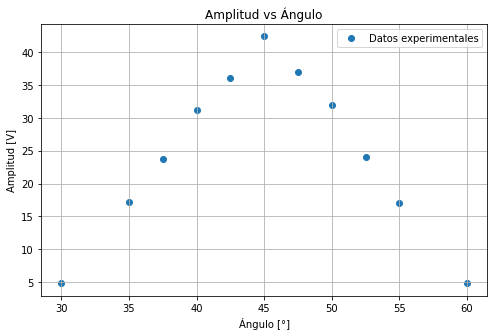

In [ ]:
beta=metodo1['Beta [°]']
amplitud=metodo1['Amplitud']
plt.figure(figsize=[8,5])
plt.scatter(beta,amplitud,label='Datos experimentales')
plt.title('Amplitud vs Ángulo')
plt.xlabel('Ángulo [°]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()

In [ ]:
f_int1=interp1d(beta,amplitud, kind='quadratic')
max = minimize_scalar(lambda x: -f_int1(x),bounds=(40, 50), method='bounded')
print(max)

     fun: -42.41020976115426
 message: 'Solution found.'
    nfev: 7
  status: 0
 success: True
       x: 45.08559638077981


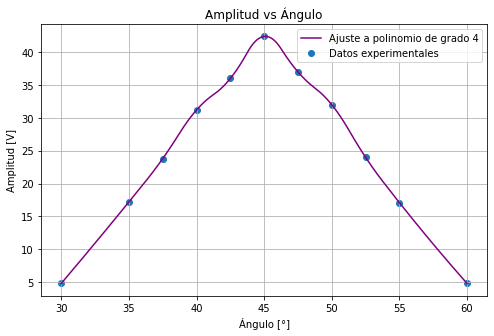

In [ ]:
beta2=np.linspace(30,60,1000)
plt.figure(figsize=[8,5])
plt.scatter(beta,amplitud,label='Datos experimentales')
plt.plot(beta2,f_int1(beta2), c='purple',label='Ajuste a polinomio de grado 4')
plt.title('Amplitud vs Ángulo')
plt.xlabel('Ángulo [°]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()

In [ ]:
coef=np.polyfit(beta,amplitud,4)
f=np.poly1d(coef)
R_S1 = r2_score(amplitud,f(beta))
RMSE1 = mean_squared_error(amplitud,f(beta), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("Coeficientes: "+str(coef))

R^2 y RMSE para 1: 0.9895936157476788 1.2283686723670575
Coeficientes: [ 6.27319347e-04 -1.13115152e-01  7.35499767e+00 -2.03393776e+02
  2.03330909e+03]


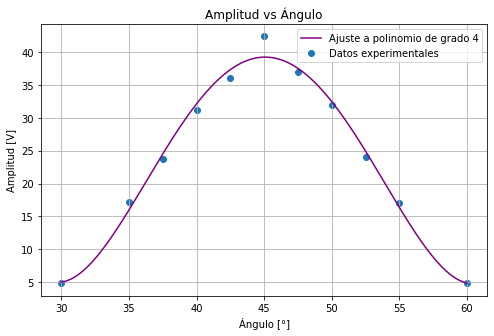

In [ ]:
beta2=np.linspace(30,60,1000)
plt.figure(figsize=[8,5])
plt.scatter(beta,amplitud,label='Datos experimentales')
plt.plot(beta2,f(beta2), c='purple',label='Ajuste a polinomio de grado 4')
plt.title('Amplitud vs Ángulo')
plt.xlabel('Ángulo [°]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()

In [ ]:
beta2=np.linspace(30,60,1000)
betar=45
max_x = fmin(lambda x: -f(x), 45)
max = minimize_scalar(lambda x: -f(x),bounds=(30, 60), method='bounded')

Optimization terminated successfully.
         Current function value: -39.243977
         Iterations: 16
         Function evaluations: 32


In [ ]:
print(max)

     fun: -39.24397707857884
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 45.06704077675296


In [ ]:
print((45.06704077675296-45)/45*100)

0.14897950389546902


#Metodo 2

In [ ]:
metodo2 = pd.read_excel("Datos_Lab_5.xlsx", 'Fase 2')
metodo2

,Alfa [°],Beta [°],Amplitud máxima [V]
0,30,31,42.4
1,35,35,42.4
2,40,40,42.4
3,45,45,42.4
4,50,49,43.2
5,55,56,43.2
6,60,60,42.4


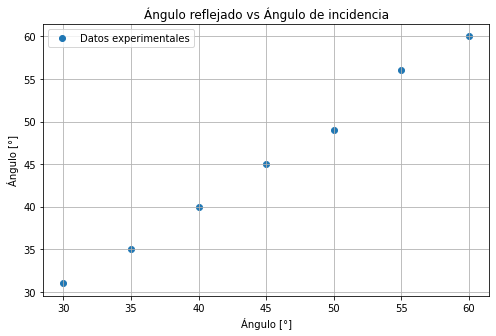

In [ ]:
alfa=metodo2['Alfa [°]']
beta=metodo2['Beta [°]']
plt.figure(figsize=[8,5])
plt.scatter(alfa,beta,label='Datos experimentales')
plt.title('Ángulo reflejado vs Ángulo de incidencia')
plt.xlabel('Ángulo [°]')
plt.ylabel('Ángulo [°]')
plt.legend()
plt.grid()

In [ ]:
coef=np.polyfit(alfa,beta,1)
f=np.poly1d(coef)
R_S1 = r2_score(beta,f(alfa))
RMSE1 = mean_squared_error(beta,f(alfa), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("Coeficientes: "+str(coef))

R^2 y RMSE para 1: 0.9960251046025105 0.6226998490772363
Coeficientes: [0.98571429 0.78571429]


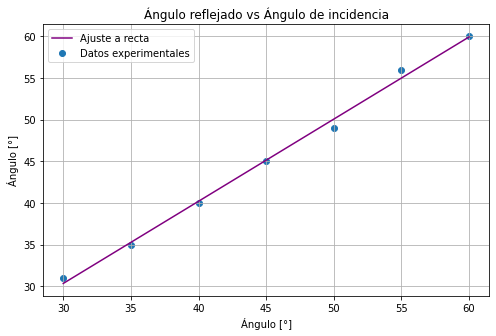

In [ ]:
alfa2=np.linspace(30,60,1000)
plt.figure(figsize=[8,5])
plt.scatter(alfa,beta,label='Datos experimentales')
plt.plot(alfa2,f(alfa2), c='purple',label='Ajuste a recta')
plt.title('Ángulo reflejado vs Ángulo de incidencia')
plt.xlabel('Ángulo [°]')
plt.ylabel('Ángulo [°]')
plt.legend()
plt.grid()

In [ ]:
print(f(45))
print((f(45)-45)/45*100)

45.14285714285717
0.31746031746037157


#Cálculo velocidad del sonido

In [ ]:
T=28
V_teo = round(331.6 + 0.6*T,1)
print('Vel. sonido Teorica = '+str(V_teo)+'[m/s]')

Vel. sonido Teorica = 348.4[m/s]


In [ ]:
data_vs = pd.read_excel("Datos_Lab_5.xlsx", 'Fase 3')
data_vs

,Delta Distancia [cm],Delta Tiempo [ms]
0,30,1.8
1,40,2.2
2,50,2.9
3,60,3.5
4,70,4.1
5,80,4.7


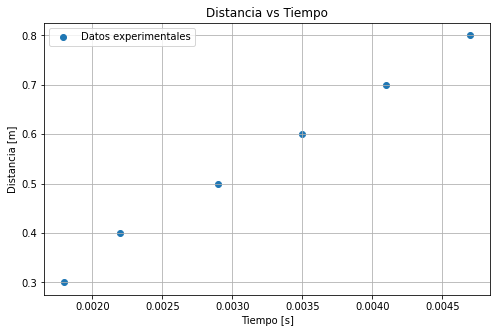

In [ ]:
t=data_vs['Delta Tiempo [ms]']*1e-3
d=data_vs['Delta Distancia [cm]']*1e-2
plt.figure(figsize=[8,5])
plt.scatter(t,d,label='Datos experimentales')
plt.title('Distancia vs Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Distancia [m]')
plt.legend()
plt.grid()

In [ ]:
coef=np.polyfit(t,d,1)
f=np.poly1d(coef)
R_S1 = r2_score(d,f(t))
RMSE1 = mean_squared_error(d,f(t), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("Coeficientes: "+str(coef))

R^2 y RMSE para 1: 0.9968663594470046 0.00956022224963237
Coeficientes: [1.67741935e+02 1.32258065e-02]


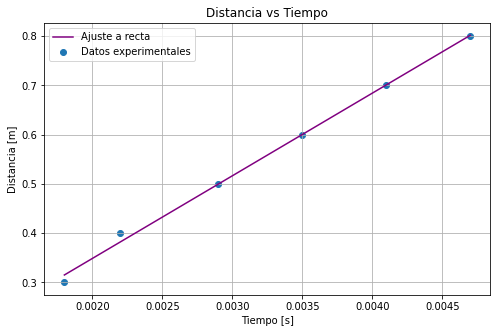

In [ ]:
t=data_vs['Delta Tiempo [ms]']*1e-3
d=data_vs['Delta Distancia [cm]']*1e-2
plt.figure(figsize=[8,5])
plt.scatter(t,d,label='Datos experimentales')
plt.plot(t,f(t),label='Ajuste a recta',c='purple')
plt.title('Distancia vs Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Distancia [m]')
plt.legend()
plt.grid()

In [ ]:
V_exp = coef[0]*2
print('Vel. sonido experimental = '+str(V_exp)+'[m/s]')

Vel. sonido experimental = 335.48387096774195[m/s]


In [ ]:
err = (V_teo-V_exp)/V_teo*100
print('Porcentaje de error = '+str(err)+'%')

Porcentaje de error = 3.7072701011073557%


#Distancia entre placas

In [ ]:
data_dp = pd.read_excel("Datos_Lab_5.xlsx", 'Fase 4')
data_dp

,Delta Distancia [cm],Tiempo 1 [ms],Tiempo 2 [ms],dt [ms]
0,20,1.9,3,1.1
1,25,1.6,3,1.4
2,30,1.3,3,1.7
3,35,1.1,3,1.9


In [ ]:
dt=np.array(data_dp['dt [ms]']*1e-3)
d=np.array(data_dp['Delta Distancia [cm]']*1e-2)
d_calc_vexp = V_exp*dt/2
d_calc_vteo = V_teo*dt/2
print(d_calc_vexp)
print(d_calc_vteo)

[0.18451613 0.23483871 0.28516129 0.31870968]
[0.19162 0.24388 0.29614 0.33098]


In [ ]:
err_d_vexp=(d-d_calc_vexp)/d*100
err_d_vteo=(d-d_calc_vteo)/d*100
print(err_d_vexp)
print(err_d_vteo)

[7.74193548 6.06451613 4.94623656 8.94009217]
[4.19       2.448      1.28666667 5.43428571]
